In [219]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [220]:
train_data = pd.read_csv('train.csv')

In [221]:
train_data.head(5)

,Date,Hour,CellName,Traffic
0,10/23/2017 0:00,7,Cell_001803,15.13867
1,10/23/2017 0:00,2,Cell_002303,2.05516
2,10/23/2017 0:00,7,Cell_004083,71.55308
3,10/23/2017 0:00,0,Cell_003781,557.98491
4,10/23/2017 0:00,3,Cell_000112,0.98166


In [222]:
train_data.head(5).to_json('data_before')

In [223]:
train_data.shape

(497544, 4)

In [224]:
# Проверка на пропуски
train_data.isnull().any()

Date        False
Hour        False
CellName    False
Traffic     False
dtype: bool

## Построение графиков зависимости трафика от ячейки и трафика от времени суток

In [225]:
traff_SpecificCell = {}

In [226]:
for cell, traff in zip(train_data['CellName'], train_data['Traffic']):
    if cell in traff_SpecificCell:
        traff_SpecificCell[cell] += traff
    else:
        traff_SpecificCell[cell] = traff

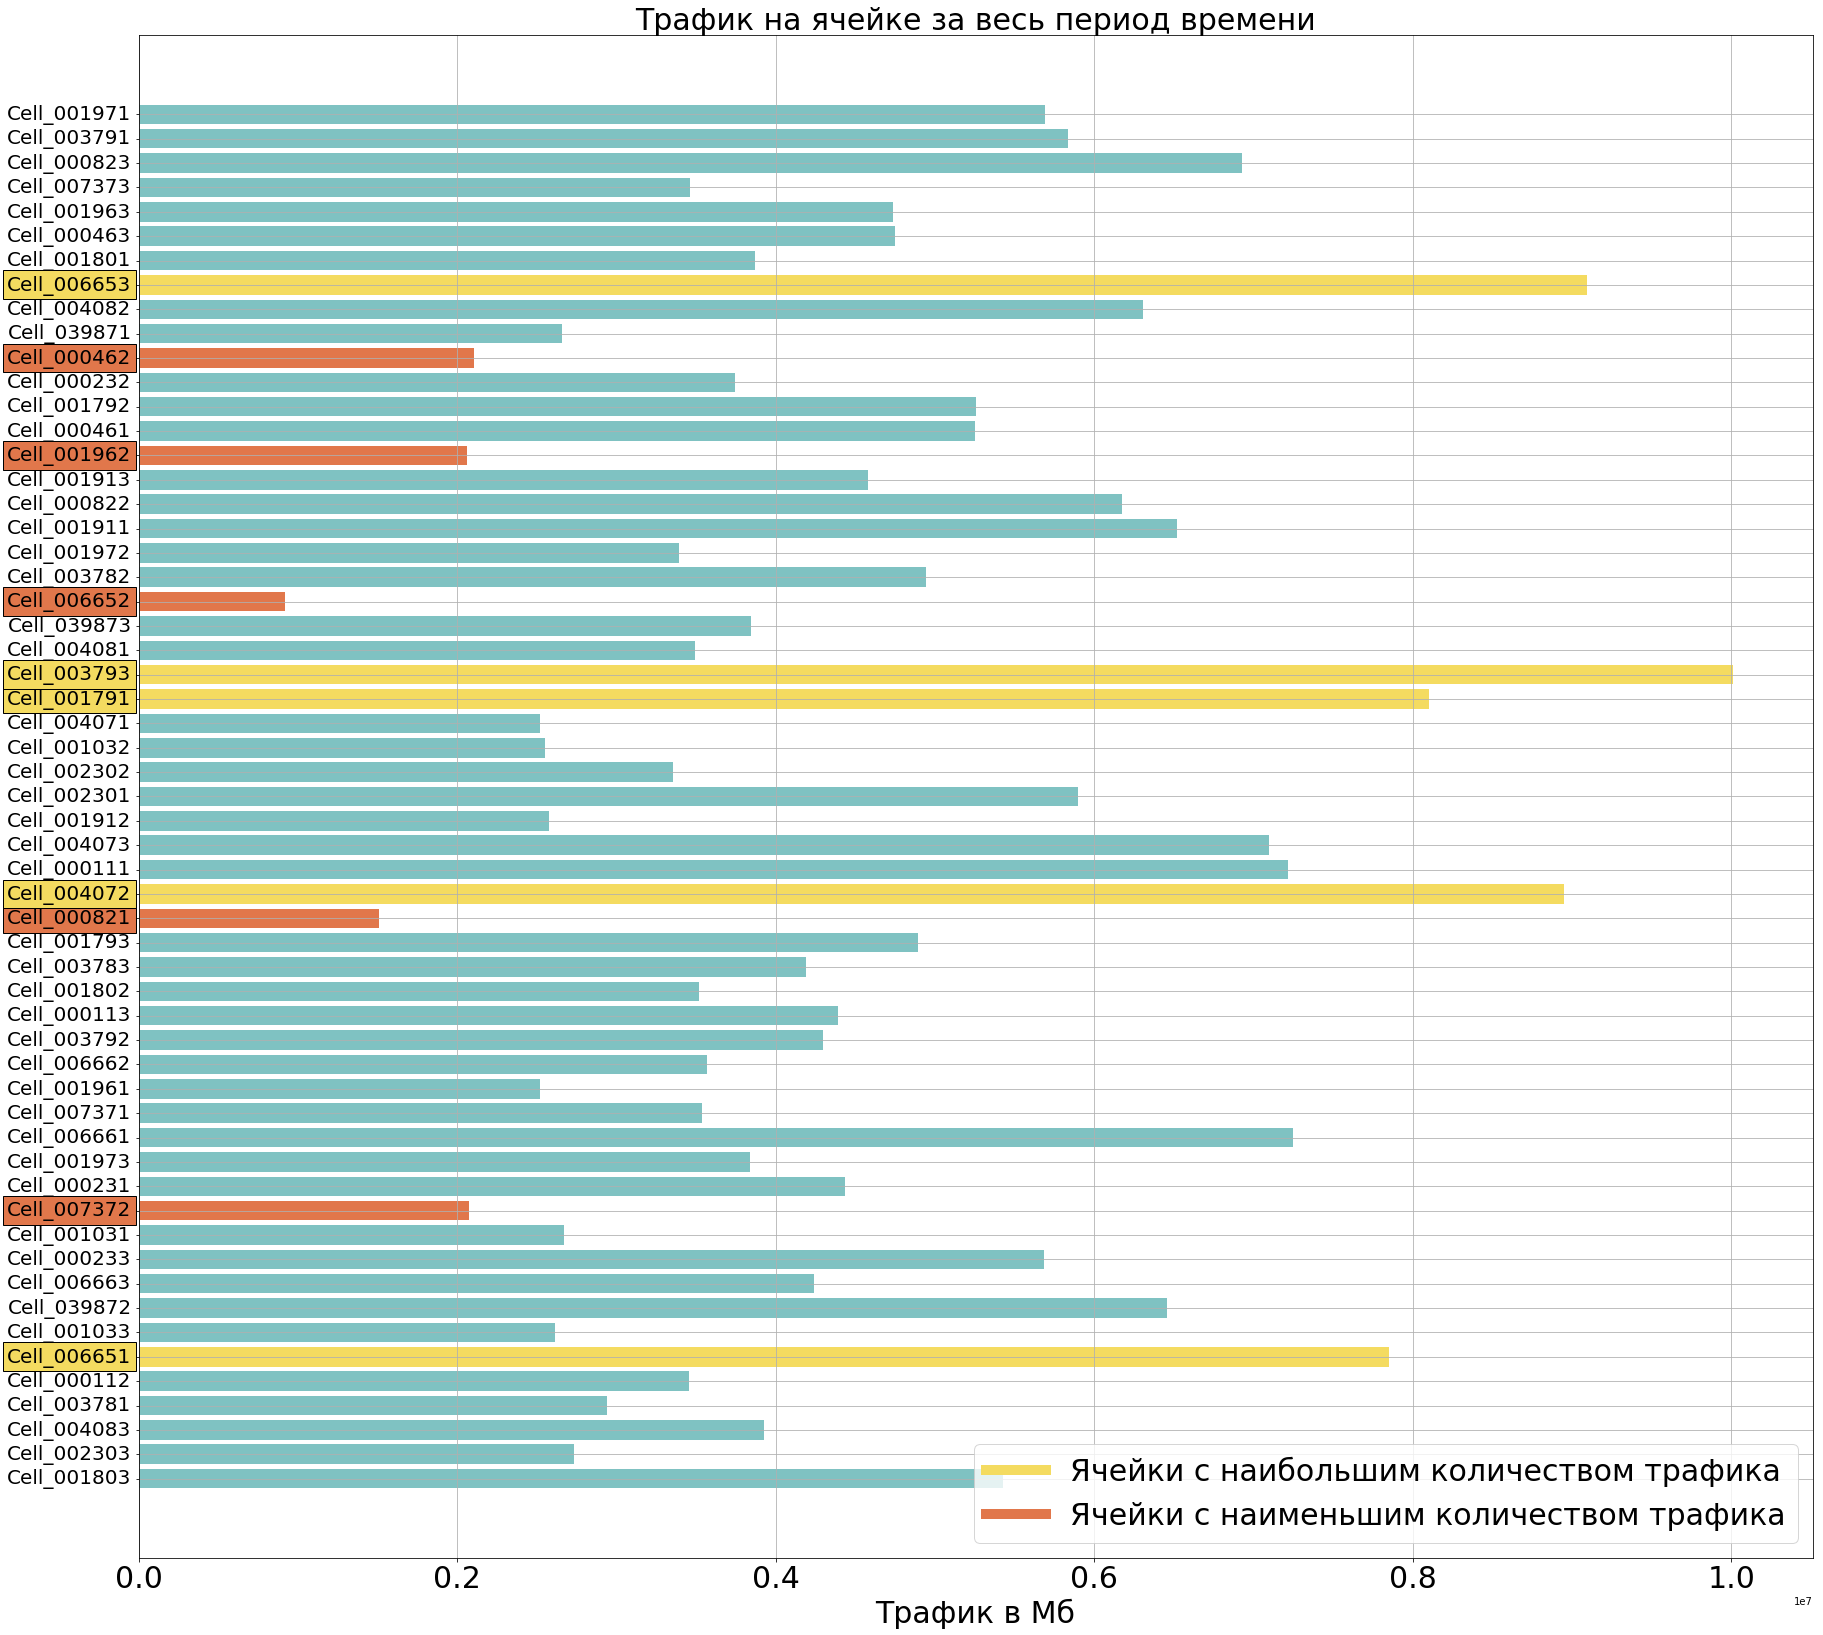

In [227]:
specCell = []
specTraff = []

for cell in traff_SpecificCell:
    specCell.append(cell)
    specTraff.append(traff_SpecificCell[cell])
    
min_traffic, max_traffic = min(specTraff), max(specTraff)  

position = np.arange(len(specCell))

fig, ax = plt.subplots()

barh = ax.barh(position, specTraff, color = '#7FC2C2')
ax.set_yticks(position)
ax.grid()
labels = ax.set_yticklabels(specCell, fontsize = 18, color = 'black', verticalalignment = 'center')

ten_percent = int(len(specCell) * 0.1)
small_traffic, big_traffic = [], []
sort_traff = sorted(specTraff)
sort_traff = [sort_traff[ten_percent], sort_traff[-ten_percent]]
for i in range(len(specTraff)):
    if specTraff[i] < sort_traff[0]:
        small_traffic.append(i)
    elif specTraff[i] >= sort_traff[1]:
        big_traffic.append(i)

for elemS, elemB in zip(small_traffic, big_traffic):
    labels[elemS].set_bbox({'facecolor':'#E1774B'})
    barh[elemS].set_facecolor('#E1774B') 
    labels[elemB].set_bbox({'facecolor':'#F4DB60'})
    barh[elemB].set_facecolor('#F4DB60') 
    
fig.set_figwidth(30)
fig.set_figheight(28)
plt.title('Трафик на ячейке за весь период времени', fontsize=30)
plt.xlabel("Трафик в Мб", fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 20)
handle1 = mpl.lines.Line2D([], [], c='#F4DB60', linewidth = 10)
handle2 = mpl.lines.Line2D([], [], c='#E1774B', linewidth = 10)
plt.legend(handles=[handle1, handle2], labels=['Ячейки с наибольшим количеством трафика', 'Ячейки с наименьшим количеством трафика'], prop={'size': 30})
plt.show()
fig.savefig('Трафик на ячейках.svg')
fig.savefig('Трафик на ячейках.png')

In [128]:
lowest_traff_SpecificTime = {}
highest_traff_SpecificTime = {}
mean_traff_SpecififcTime = {}
lowest_cell = ('Cell_007372', 'Cell_000821', 'Cell_006652', 'Cell_001962', 'Cell_000462')
highest_cell = ('Cell_006651', 'Cell_004072', 'Cell_001791', 'Cell_003793', 'Cell_006653')

In [129]:
for cell, time, traff in zip(train_data['CellName'], train_data['Hour'], train_data['Traffic']):
    if (time in lowest_traff_SpecificTime) and (cell in lowest_cell):
        lowest_traff_SpecificTime[time] += traff
    elif (time not in lowest_traff_SpecificTime) and (cell in lowest_cell):
        lowest_traff_SpecificTime[time] = traff
    if (time in highest_traff_SpecificTime) and (cell in highest_cell):
        highest_traff_SpecificTime[time] += traff
    elif (time not in highest_traff_SpecificTime) and (cell in highest_cell):
        highest_traff_SpecificTime[time] = traff
    if (time in mean_traff_SpecififcTime) and (cell not in highest_cell) and (cell not in lowest_cell):
        mean_traff_SpecififcTime[time] += traff
    elif (time not in mean_traff_SpecififcTime) and (cell not in highest_cell) and (cell not in lowest_cell):
        mean_traff_SpecififcTime[time] = traff

In [130]:
low_traff = np.array([])
high_traff = np.array([])
mean_traff = np.array([])
for i in range(24):
    low_traff = np.append(low_traff, [lowest_traff_SpecificTime.get(i)])
    high_traff = np.append(high_traff, [highest_traff_SpecificTime.get(i)])
    mean_traff = np.append(mean_traff, [mean_traff_SpecififcTime.get(i)])

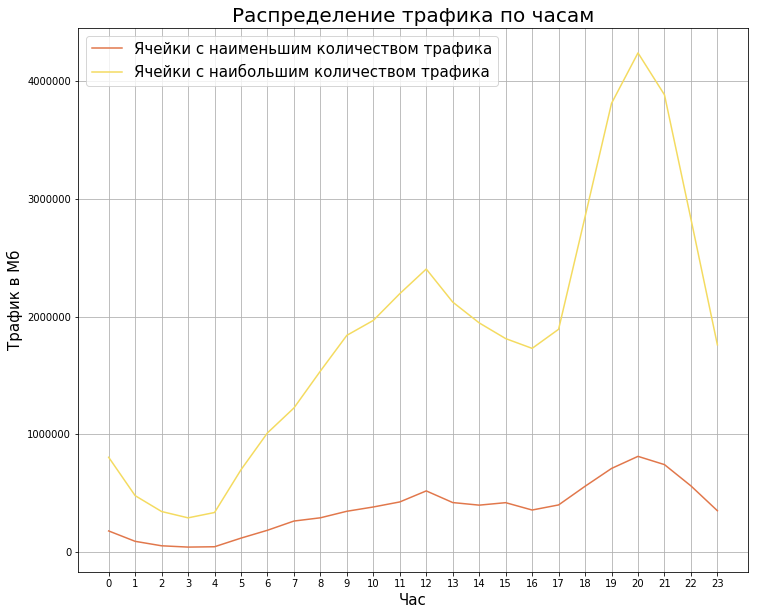

In [131]:
fig, ax = plt.subplots()

ax.plot(range(24), low_traff, c = '#E1774B', label = 'Ячейки с наименьшим количеством трафика')
ax.plot(range(24), high_traff, c = '#F4DB60', label = 'Ячейки с наибольшим количеством трафика')
ax.grid()
ax.legend(fontsize = 15)

fig.set_figwidth(12)
fig.set_figheight(10)

plt.title('Распределение трафика по часам', fontsize=20)
plt.xlabel('Час', fontsize = 15)
plt.ylabel('Трафик в Мб', fontsize=15)
plt.xticks(np.arange(0, 24, 1), fontsize = 10)
fig.savefig('Распределение трафика по часам.svg')
fig.savefig('Распределение трафика по часам.png')

## Предобработка данных

In [132]:
train_data['Month'] = train_data.Date.str[:train_data.Date.str.find('/')[0]]
train_data['Day'] = train_data.Date.str[train_data.Date.str.find('/')[0]+1:train_data.Date.str.rfind('/')[0]]
train_data['Year'] = train_data.Date.str[train_data.Date.str.rfind('/')[0]+1:train_data.Date.str.rfind('/')[0]+5]

In [133]:
train_data.head(5)

,Date,Hour,CellName,Traffic,Month,Day,Year
0,10/23/2017 0:00,7,Cell_001803,15.13867,10,23,2017
1,10/23/2017 0:00,2,Cell_002303,2.05516,10,23,2017
2,10/23/2017 0:00,7,Cell_004083,71.55308,10,23,2017
3,10/23/2017 0:00,0,Cell_003781,557.98491,10,23,2017
4,10/23/2017 0:00,3,Cell_000112,0.98166,10,23,2017


In [134]:
train_data.Year.unique()

array(['2017', '017 ', '18 0', '018 ', '2018'], dtype=object)

In [135]:
train_data.Year.replace('017 ', '2017', inplace=True)
train_data.Year.replace('18 0', '2018', inplace=True)
train_data.Year.replace('018 ', '2018', inplace=True)

In [136]:
train_data.Year.unique()

array(['2017', '2018'], dtype=object)

In [137]:
train_data.Year.replace('2017', 2017, inplace=True)
train_data.Year.replace('2018', 2018, inplace=True)

In [138]:
train_data.Year.unique()

array([2017, 2018])

In [139]:
train_data.Month.unique()

array(['10', '11', '12', '1/', '2/', '3/', '4/', '5/', '6/', '7/', '8/',
       '9/'], dtype=object)

In [140]:
train_data.Date[train_data.Month == '1/'].unique()

array(['1/1/2018 0:00', '1/2/2018 0:00', '1/3/2018 0:00', '1/4/2018 0:00',
       '1/5/2018 0:00', '1/6/2018 0:00', '1/7/2018 0:00', '1/8/2018 0:00',
       '1/9/2018 0:00', '1/10/2018 0:00', '1/11/2018 0:00',
       '1/12/2018 0:00', '1/13/2018 0:00', '1/14/2018 0:00',
       '1/15/2018 0:00', '1/16/2018 0:00', '1/17/2018 0:00',
       '1/18/2018 0:00', '1/19/2018 0:00', '1/20/2018 0:00',
       '1/21/2018 0:00', '1/22/2018 0:00', '1/23/2018 0:00',
       '1/24/2018 0:00', '1/25/2018 0:00', '1/26/2018 0:00',
       '1/27/2018 0:00', '1/28/2018 0:00', '1/29/2018 0:00',
       '1/30/2018 0:00', '1/31/2018 0:00'], dtype=object)

In [141]:
for i in range(1, 10):
    train_data.Month.replace(str(i)+'/', str(i), inplace=True)

In [142]:
train_data.Month.unique()

array(['10', '11', '12', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [143]:
for i in range(1, 13):
    train_data.Month.replace(str(i), i, inplace=True)

In [144]:
train_data.Month.unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [145]:
train_data.Day.unique()

array(['23', '24', '25', '26', '27', '28', '29', '30', '31', '1/', '2/',
       '3/', '4/', '5/', '6/', '7/', '8/', '9/', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '/2', '0/'],
      dtype=object)

In [146]:
for i in range(1, 10):
    train_data.Day[train_data.Date.str[2:5] == '/' + str(i) + '/'] = train_data.Date.str[3]
    train_data.Day[train_data.Day == str(i) + '/'] = train_data.Date.str[2:4]

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [147]:
train_data.Day.unique()

array(['23', '24', '25', '26', '27', '28', '29', '30', '31', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '/2', '0/'],
      dtype=object)

In [148]:
print(train_data.Date[train_data.Day=='/2'].unique())
print(train_data.Date[train_data.Day=='0/'].unique())

['1/1/2018 0:00' '1/2/2018 0:00' '1/3/2018 0:00' '1/4/2018 0:00'
 '1/5/2018 0:00' '1/6/2018 0:00' '1/7/2018 0:00' '1/8/2018 0:00'
 '1/9/2018 0:00' '2/1/2018 0:00' '2/2/2018 0:00' '2/3/2018 0:00'
 '2/4/2018 0:00' '2/5/2018 0:00' '2/6/2018 0:00' '2/7/2018 0:00'
 '2/8/2018 0:00' '2/9/2018 0:00' '3/1/2018 0:00' '3/2/2018 0:00'
 '3/3/2018 0:00' '3/4/2018 0:00' '3/5/2018 0:00' '3/6/2018 0:00'
 '3/7/2018 0:00' '3/8/2018 0:00' '3/9/2018 0:00' '4/1/2018 0:00'
 '4/2/2018 0:00' '4/3/2018 0:00' '4/4/2018 0:00' '4/5/2018 0:00'
 '4/6/2018 0:00' '4/7/2018 0:00' '4/8/2018 0:00' '4/9/2018 0:00'
 '5/1/2018 0:00' '5/2/2018 0:00' '5/3/2018 0:00' '5/4/2018 0:00'
 '5/5/2018 0:00' '5/6/2018 0:00' '5/7/2018 0:00' '5/8/2018 0:00'
 '5/9/2018 0:00' '6/1/2018 0:00' '6/2/2018 0:00' '6/3/2018 0:00'
 '6/4/2018 0:00' '6/5/2018 0:00' '6/6/2018 0:00' '6/7/2018 0:00'
 '6/8/2018 0:00' '6/9/2018 0:00' '7/1/2018 0:00' '7/2/2018 0:00'
 '7/3/2018 0:00' '7/4/2018 0:00' '7/5/2018 0:00' '7/6/2018 0:00'
 '7/7/2018 0:00' '7/8/201

In [149]:
train_data.Day[train_data.Day == '/2'] = train_data.Date.str[2]

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
train_data.Day[train_data.Day == '0/'] = train_data.Date.str[2:4]

/home/nikstep/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [151]:
train_data.Day.unique()

array(['23', '24', '25', '26', '27', '28', '29', '30', '31', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22'], dtype=object)

In [152]:
for i in range(32):
    train_data.Day.replace(str(i), i, inplace=True)

In [153]:
train_data.Day.unique()

array([23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [154]:
train_data.drop(columns=['Date'], inplace=True)

In [155]:
train_data.head(5)

,Hour,CellName,Traffic,Month,Day,Year
0,7,Cell_001803,15.13867,10,23,2017
1,2,Cell_002303,2.05516,10,23,2017
2,7,Cell_004083,71.55308,10,23,2017
3,0,Cell_003781,557.98491,10,23,2017
4,3,Cell_000112,0.98166,10,23,2017


## Анализ зависимостей

In [156]:
Traffic_2017 = train_data.Traffic[train_data.Year == 2017].sum()
Traffic_2018 = train_data.Traffic[train_data.Year == 2018].sum()

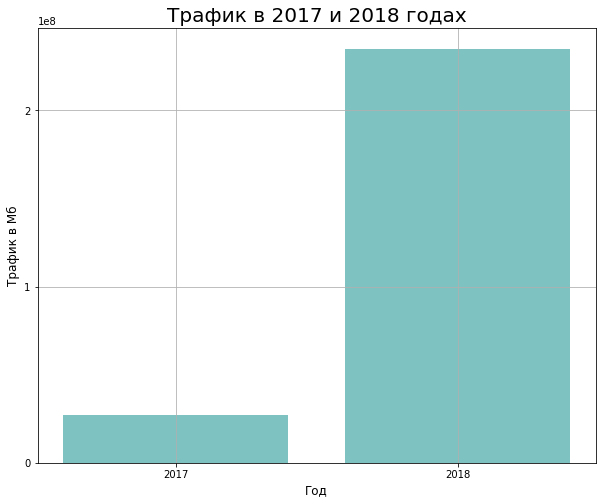

In [157]:
fig, ax = plt.subplots()
ax.bar(2017, Traffic_2017, color= '#7FC2C2')
ax.bar(2018, Traffic_2018, color= '#7FC2C2')
ax.grid()

fig.set_figwidth(10)
fig.set_figheight(8)
plt.title('Трафик в 2017 и 2018 годах', fontsize=20)
plt.xlabel('Год', fontsize = 12)
plt.ylabel('Трафик в Мб', fontsize=12)
plt.xticks(np.arange(2017, 2019, 1), fontsize = 10)
plt.yticks(np.arange(0, 2.1e8, 1e8), fontsize = 10)
plt.show()
fig.savefig('Трафик в 2017 и 2018 годах.svg')
fig.savefig('Трафик в 2017 и 2018 годах.png')

In [158]:
Traffic_2018part1 = train_data.Traffic[(train_data.Year == 2017) | ((train_data.Year == 2018) 
                                                                     & (train_data.Month < 5))].sum()
Traffic_2018part2 = train_data.Traffic[(train_data.Year == 2018) & (train_data.Month >= 5)].sum()

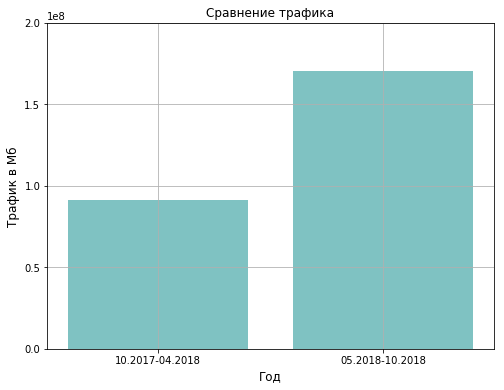

In [159]:
fig, ax = plt.subplots()
ax.bar(np.arange(2),[Traffic_2018part1, Traffic_2018part2], color= '#7FC2C2')
ax.grid()
ax.set_xticklabels(['10.2017-04.2018', '05.2018-10.2018'], fontsize = 13)

fig.set_figwidth(8)
fig.set_figheight(6)
plt.title('Сравнение трафика', fontsize=12)
plt.xlabel('Год', fontsize = 12)
plt.ylabel('Трафик в Мб', fontsize=12)
plt.xticks(np.arange(0, 2, 1), fontsize = 10)
plt.yticks(np.arange(0, 2.1e8, 0.5e8), fontsize = 10)
plt.show()
fig.savefig('Сравнение трафика.svg')
fig.savefig('Сравнение трафика.png')

In [160]:
TrafficMonth = []
months = ['Янв.', 'Февр.', 'Март', 'Апр.', 'Май', 'Июнь', 
          'Июль', 'Авг', 'Сент.', 'Окт.', 'Нояб.', 'Дек.'] 

for i in range(1, 13):
    TrafficMonth.append(train_data.Traffic[train_data.Month == i].sum())

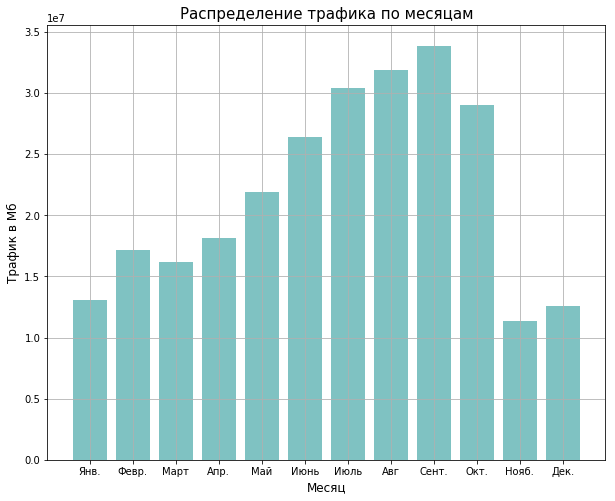

In [161]:
fig, ax = plt.subplots()
ax.bar(np.arange(1, 13), TrafficMonth, color= '#7FC2C2')
ax.grid()
ax.set_xticklabels(months, fontsize = 13)

fig.set_figwidth(10)
fig.set_figheight(8)
plt.title('Распределение трафика по месяцам', fontsize=15)
plt.xlabel('Месяц', fontsize = 12)
plt.ylabel('Трафик в Мб', fontsize=12)
plt.xticks(np.arange(1, 13, 1), fontsize = 10)
plt.show()
fig.savefig('Распределение трафика по месяцам.svg')
fig.savefig('Распределение трафика по месяцам.png')

In [162]:
TrafficDay = []

for i in range(1, 32):
    TrafficDay.append(train_data.Traffic[train_data.Day == i].sum())

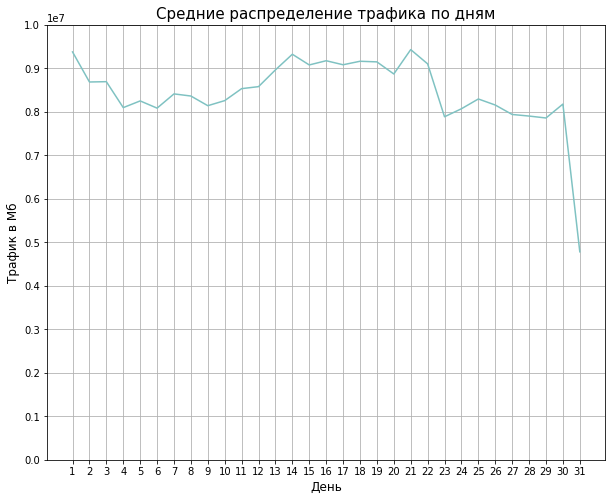

In [163]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 32), TrafficDay, color = '#7FC2C2')
ax.grid()
ax.set_xticklabels(np.arange(1, 32), fontsize = 13)

fig.set_figwidth(10)
fig.set_figheight(8)
plt.title('Средние распределение трафика по дням', fontsize=15)
plt.xlabel('День', fontsize = 12)
plt.ylabel('Трафик в Мб', fontsize=12)
plt.xticks(np.arange(1, 32, 1), fontsize = 10)
plt.yticks(np.arange(0, 1.1e7, 0.1e7), fontsize = 10)
plt.show()
fig.savefig('Средние распределение трафика по дням.svg')
fig.savefig('Средние распределение трафика по дням.png')

In [164]:
train_data.head()

,Hour,CellName,Traffic,Month,Day,Year
0,7,Cell_001803,15.13867,10,23,2017
1,2,Cell_002303,2.05516,10,23,2017
2,7,Cell_004083,71.55308,10,23,2017
3,0,Cell_003781,557.98491,10,23,2017
4,3,Cell_000112,0.98166,10,23,2017


## Корреляция признаков

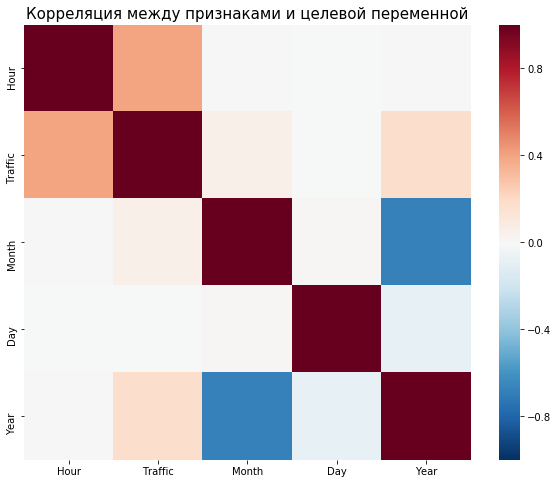

In [165]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)
ax = sns.heatmap(train_data.drop(columns=['CellName']).corr(), 
                 cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0)
plt.title('Корреляция между признаками и целевой переменной', fontsize=15)

fig.savefig('Корреляция.svg')
fig.savefig('Корреляция.png')

## Распределение целевой переменной

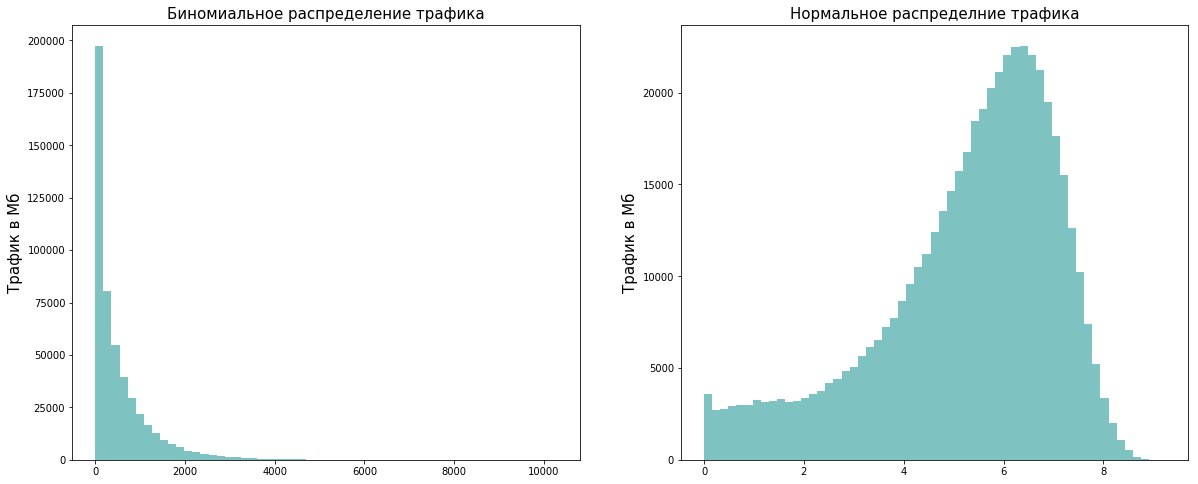

In [166]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.subplot(1, 2, 1)
plt.hist(train_data.Traffic, bins=57, color = '#7FC2C2')
plt.title('Биномиальное распределение трафика', fontsize=15)
plt.ylabel('Трафик в Мб', fontsize=15)
# plt.xlabel('Количество трафика с таким значением', fontsize=20)

plt.subplot(1, 2, 2)
plt.hist(np.log1p(train_data.Traffic), bins=57, color = '#7FC2C2')
plt.title('Нормальное распределние трафика', fontsize=15)
plt.ylabel('Трафик в Мб', fontsize=15)
fig.savefig('Распределения трафика.svg')
fig.savefig('Распределения трафика.png')

In [167]:
train_data.Month = (train_data.Month - 1)/11
train_data.Day = (train_data.Day - 1)/30
train_data.Hour = np.sin(train_data.Hour/24)

In [168]:
target = pd.DataFrame(train_data.Traffic)
train_data.drop(columns='Traffic', inplace=True)

In [169]:
train_data.head(5)

,Hour,CellName,Month,Day,Year
0,0.287549,Cell_001803,0.818182,0.733333,2017
1,0.083237,Cell_002303,0.818182,0.733333,2017
2,0.287549,Cell_004083,0.818182,0.733333,2017
3,0.000000,Cell_003781,0.818182,0.733333,2017
4,0.124675,Cell_000112,0.818182,0.733333,2017


In [170]:
target.head(5)

,Traffic
0,15.13867
1,2.05516
2,71.55308
3,557.98491
4,0.98166


In [171]:
cellsFrameLin = pd.get_dummies(train_data.CellName, drop_first=True) # data for linear model (delete 1 feture)
cellsFrameTree = pd.get_dummies(train_data.CellName) # data for nonlinear model
Year = pd.get_dummies(train_data.Year)
print('Linear Model data shape: ', cellsFrameLin.shape)
print('Nonlinear Model data shape: ', cellsFrameTree.shape)

Linear Model data shape:  (497544, 56)
Nonlinear Model data shape:  (497544, 57)


In [172]:
train_data.drop(columns=['CellName'], inplace=True)
train_data.drop(columns=['Year'], inplace=True)

In [173]:
train_data_Lin = train_data
train_data_Tree = train_data
target_Lin = np.log1p(target.Traffic)
target_Tree = np.log1p(target.Traffic)

In [174]:
train_data_Lin = train_data_Lin.join(cellsFrameLin)
train_data_Tree = train_data_Tree.join(cellsFrameTree)
train_data_Lin = train_data_Lin.join(Year)
train_data_Tree = train_data_Tree.join(Year)

In [175]:
del cellsFrameLin, cellsFrameTree, Year, train_data, target

In [176]:
train_data_Lin.head()

,Hour,Month,Day,Cell_000112,Cell_000113,Cell_000231,Cell_000232,Cell_000233,Cell_000461,Cell_000462,...,Cell_006662,Cell_006663,Cell_007371,Cell_007372,Cell_007373,Cell_039871,Cell_039872,Cell_039873,2017,2018
0,0.287549,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.083237,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.287549,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.124675,0.818182,0.733333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [177]:
train_data_Tree.head()

,Hour,Month,Day,Cell_000111,Cell_000112,Cell_000113,Cell_000231,Cell_000232,Cell_000233,Cell_000461,...,Cell_006662,Cell_006663,Cell_007371,Cell_007372,Cell_007373,Cell_039871,Cell_039872,Cell_039873,2017,2018
0,0.287549,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.083237,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.287549,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.818182,0.733333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.124675,0.818182,0.733333,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [178]:
train_data_Tree.head(5).to_json('data_after')

## Нелинейные модели

In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV 

In [180]:
X_train, X_test, y_train, y_test = train_test_split(train_data_Tree, target_Tree, random_state=42)

In [181]:
d = int(train_data_Tree.shape[1]**0.5)

In [182]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
rf_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=300, max_features=d, splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
gb_reg = GradientBoostingRegressor(max_features=d, n_estimators=200, criterion='friedman_mse')

In [183]:
%%time

bag_reg.fit(X_train, y_train)

CPU times: user 346 ms, sys: 563 ms, total: 909 ms
Wall time: 1min 56s


BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [184]:
%%time

rf_reg.fit(X_train, y_train)

CPU times: user 334 ms, sys: 397 ms, total: 731 ms
Wall time: 2min 2s


BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=300, max_features=7,
           max_leaf_nodes=16, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='random'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [185]:
%%time

gb_reg.fit(X_train, y_train)

CPU times: user 35.9 s, sys: 426 ms, total: 36.3 s
Wall time: 40 s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=7,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [186]:
print('Bagging RMSE: ', mean_squared_error(y_test, bag_reg.predict(X_test))**0.5)
print('Random Forest RMSE: ', mean_squared_error(y_test, rf_reg.predict(X_test))**0.5)
print('Gradient Boosting RMSE: ', mean_squared_error(y_test, gb_reg.predict(X_test))**0.5)

Bagging RMSE:  1.2777912469654948
Random Forest RMSE:  1.4782660264442309
Gradient Boosting RMSE:  1.1487569356801275


In [187]:
print('Bagging Determination: ', r2_score(y_test, bag_reg.predict(X_test)))
print('Random Forest Determination: ', r2_score(y_test, rf_reg.predict(X_test)))
print('Gradient Boosting Determination: ', r2_score(y_test, gb_reg.predict(X_test)))

Bagging Determination:  0.5080881600562972
Random Forest Determination:  0.3416260325414566
Gradient Boosting Determination:  0.6024207124712104


In [188]:
print('Bagging MAE: ', mean_absolute_error(y_test, bag_reg.predict(X_test)))
print('Random Forest MAE: ', mean_absolute_error(y_test, rf_reg.predict(X_test)))
print('Gradient Boosting MAE: ', mean_absolute_error(y_test, gb_reg.predict(X_test)))

Bagging MAE:  0.9786172413870861
Random Forest MAE:  1.1596860357797953
Gradient Boosting MAE:  0.8799161866356916


## Найдем параметры для GradientBoosting с помощью GridSearch CV - очень долго

In [189]:
# param_grid = {
#     'learning_rate': [0.1,0.05,0.02]
#     "Тут должны быть другие параметры модели"
# }

In [190]:
# gb_regGS = GradientBoostingRegressor(n_estimators = 500, min_samples_split = 10,
#                                      min_samples_leaf = 4, max_features = 5, max_depth = 10)
# grid_searchGB = GridSearchCV(estimator = gb_regGS, param_grid = param_grid, 
#                           cv = 3, verbose = 2)
# grid_searchGB.fit(X_train, y_train)

In [191]:
# gb_reg_best.fit(X_train, y_train)

In [192]:
# print('Best Gradient Boosting RMSE: ', mean_squared_error(y_test, gb_reg_best.predict(X_test))**0.5)
# print('Best Gradient Boosting Determination: ', r2_score(y_test, gb_reg_best.predict(X_test)))
# print('Best Gradient Boosting MAE: ', mean_absolute_error(y_test, gb_reg_best.predict(X_test)))

## Линейные модели

In [193]:
X_trainL, X_testL, y_trainL, y_testL = train_test_split(train_data_Lin, target_Lin, random_state=42)

In [194]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(train_data_Tree, target_Tree, random_state=42)

In [195]:
lin = LinearRegression()
svm = LinearSVR()

In [196]:
%%time

lin.fit(X_trainL, y_trainL)

CPU times: user 2.84 s, sys: 1.05 s, total: 3.89 s
Wall time: 2.42 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [197]:
%%time

svm.fit(X_trainL, y_trainL)

CPU times: user 6.04 s, sys: 280 ms, total: 6.32 s
Wall time: 6.18 s


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [198]:
print('SVM RMSE: ', mean_squared_error(y_testL, svm.predict(X_testL))**0.5)
print('LinReg RMSE: ', mean_squared_error(y_testL, lin.predict(X_testL))**0.5)

SVM RMSE:  1.304031917281284
LinReg RMSE:  1.291904829678922


In [199]:
print('SVM MAE: ', mean_absolute_error(y_testL, svm.predict(X_testL)))
print('LinReg MAE: ', mean_absolute_error(y_testL, lin.predict(X_testL)))

SVM MAE:  0.9881458112934316
LinReg MAE:  0.9950260589133058


In [200]:
print('SVM determination: ', r2_score(y_testL, svm.predict(X_testL)))
print('LinReg determination: ', r2_score(y_testL, lin.predict(X_testL)))

SVM determination:  0.4876769441787042
LinReg determination:  0.4971615236341358


In [201]:
lasso = Lasso()
ridge = Ridge()

In [202]:
lasso.fit(X_trainT, y_trainT)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [203]:
ridge.fit(X_trainT, y_trainT)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [204]:
print('Lasso RMSE: ', mean_squared_error(y_testT, lasso.predict(X_testT))**0.5)
print('Ridge RMSE: ', mean_squared_error(y_testT, ridge.predict(X_testT))**0.5)

Lasso RMSE:  1.8218764914907122
Ridge RMSE:  1.2919054585825265


In [205]:
print('Lasso MAE: ', mean_absolute_error(y_testT, lasso.predict(X_testT)))
print('Ridge MAE: ', mean_absolute_error(y_testT, ridge.predict(X_testT)))

Lasso MAE:  1.4372826928219424
Ridge MAE:  0.9950285139295457


In [206]:
print('Lasso determination: ', r2_score(y_testT, lasso.predict(X_testT)))
print('Ridge determination: ', r2_score(y_testT, ridge.predict(X_testT)))

Lasso determination:  -1.2254688078749965e-05
Ridge determination:  0.49716103406710277


In [207]:
param_grid = {
    'fit_intercept':('True', 'False'), 
    'normalize':('True', 'False'),
    'copy_X':('True', 'False')
}

In [208]:
lr = LinearRegression()
lr_gs = GridSearchCV(lr, param_grid=param_grid, cv=3, verbose=1).fit(X_trainL, y_trainL)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   27.2s finished


In [209]:
lr_gs.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True'}

In [210]:
lr = LinearRegression(copy_X=True, fit_intercept=True, normalize = True)

In [211]:
lr.fit(X_trainL, y_trainL)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [212]:
print('LinReg RMSE: ', mean_squared_error(y_testL, lr.predict(X_testL))**0.5)
print('LinReg MAE: ', mean_absolute_error(y_testL, lr.predict(X_testL)))
print('LinReg determination: ', r2_score(y_testL, lr.predict(X_testL)))

LinReg RMSE:  1.2919051415194505
LinReg MAE:  0.9950284991409623
LinReg determination:  0.49716128088338274


In [213]:
param_grid = {
    'tol':[0.001, 0.01],
    'C':[1.0, 0.1], 
    'epsilon':[0.1, 0.001, 0.2]
}

In [214]:
svm = LinearSVR(loss='epsilon_insensitive')
svm_gs= GridSearchCV(svm, param_grid=param_grid, cv=3, verbose=1).fit(X_trainL, y_trainL)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.1min finished


In [215]:
svm_gs.best_params_

{'C': 0.1, 'epsilon': 0.1, 'tol': 0.01}

In [216]:
svm = LinearSVR(C=0.1, epsilon=0.001, tol=0.001)

In [217]:
svm.fit(X_trainL, y_trainL)

LinearSVR(C=0.1, dual=True, epsilon=0.001, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.001, verbose=0)

In [218]:
print('SVM RMSE: ', mean_squared_error(y_testL, svm.predict(X_testL))**0.5)
print('SVM MAE: ', mean_absolute_error(y_testT, svm.predict(X_testL)))
print('SVM determination: ', r2_score(y_testL, svm.predict(X_testL)))

SVM RMSE:  1.305199791854059
SVM MAE:  0.9884739247762825
SVM determination:  0.48675887309470756
